203589 81425 38774
203589 203589 203589


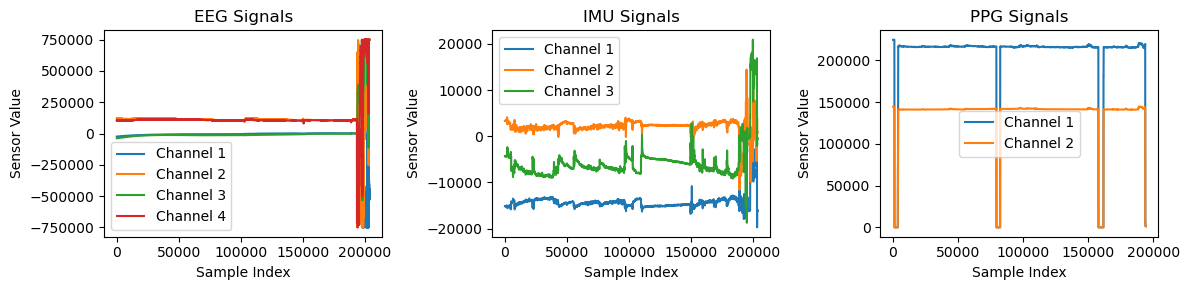

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Define session path
session_path = "data/label_dict/E243KG21FX1U_1733882556000/"  # Adjust the path if needed

# Load EEG, IMU, PPG data
eeg = np.load(os.path.join(session_path, "eeg.npy"))  # (T, EEG_channels + 1)
imu = np.load(os.path.join(session_path, "imu.npy"))  # (T, IMU_channels + 1)
ppg = np.load(os.path.join(session_path, "ppg.npy"))  # (T, PPG_channels + 1)

# Extract timestamps
timestamps_eeg, eeg = eeg[:, 0], eeg[:, [1,2,4,5]]
timestamps_imu, imu = imu[:, 0], imu[:, [1,2,3]] 
timestamps_ppg, ppg = ppg[:, 0], ppg[:, [2,3]]

print(len(eeg), len(imu), len(ppg))

# Interpolate IMU and PPG to match EEG timestamps
imu_interp = interp1d(timestamps_imu, imu, axis=0, kind='linear', fill_value='extrapolate')
ppg_interp = interp1d(timestamps_ppg, ppg, axis=0, kind='linear', fill_value='extrapolate')
imu = imu_interp(timestamps_eeg)
ppg = ppg_interp(timestamps_eeg)

print(len(eeg), len(imu), len(ppg))
# Plot EEG, IMU, PPG in subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Define signal names and data
signals = [eeg, imu, ppg]
titles = ["EEG Signals", "IMU Signals", "PPG Signals"]

for i, (data, title) in enumerate(zip(signals, titles)):
    for j in range(data.shape[1]):
        axes[i].plot(range(data.shape[0]), data[:, j], label=f"Channel {j+1}")
    axes[i].set_title(title)
    axes[i].set_xlabel("Sample Index")
    axes[i].set_ylabel("Sensor Value")
    axes[i].legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
# Load the .npy file
file_path = "data/label_dict/E243KG21FX1U_1733882556000/ppg.npy"  # Modify this path as needed
data = np.load(file_path, allow_pickle=True)  # allow_pickle=True is required if the file contains Python objects

# Print the shape of the data
print("Data shape:", data.shape)

# Print the type of the data
print("Data type:", type(data))

# If the data is a NumPy array, print some elements
if isinstance(data, np.ndarray):
    print("First few elements:", data[:])

# If the data is a list or dictionary, print its structure
elif isinstance(data, (list, dict)):
    print("Keys (if dict):", data.keys() if isinstance(data, dict) else "First few elements:", data[:5])


Data shape: (38774, 5)
Data type: <class 'numpy.ndarray'>
First few elements: [[1733882555          0     224504     144399          0]
 [1733882555          0     224494     144390          0]
 [1733882555          0     224502     144385          0]
 ...
 [1733884109          0       1208       1632          1]
 [1733884109          0       1208       1632          1]
 [1733884109          0       1208       1632          1]]
